### ________________________________NUHU ALHASSAN  

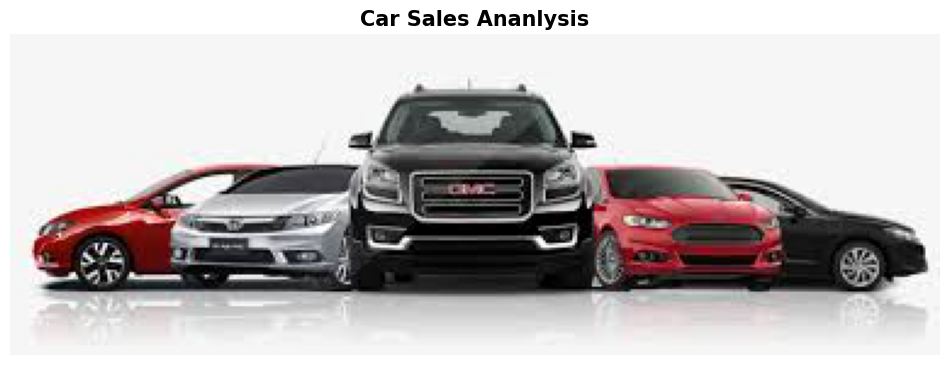

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open('cars.jpg')
plt.figure(figsize=(12, 10))
plt.title('Car Sales Ananlysis', weight='bold', size=15)
plt.grid(False)
plt.axis('off')
plt.imshow(img);

## Import the necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

## Load the dataset into pandas DataFrame

In [3]:
car_sales_df = pd.read_csv('car_sales_data.csv')

## Data understanding/ Preprocessing

In [4]:
# print the first few rows 
car_sales_df.head()

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85


In [5]:
# Randomly select 10 rows and print to have a general overview of all the dataset
car_sales_df.sample(10)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned
2451495,2022-07-04,Bryan Richardson,Christopher Stewart,Ford,Civic,2017,41557,0.108461,4507.32
850034,2022-08-07,Rachel Jones,Walter Davenport,Nissan,F-150,2021,37880,0.073049,2767.11
1653264,2022-07-05,Sabrina Petersen DDS,Stephanie Johns,Honda,F-150,2019,48894,0.116102,5676.67
2183186,2022-05-05,Erin Gilbert,Patricia Mcclure,Ford,F-150,2020,33360,0.068051,2270.18
1879453,2022-05-12,Hannah Wright,Jesse Carter,Nissan,Civic,2011,19524,0.073470,1434.44
195831,2023-03-11,Cheryl Knight,Donna Villarreal,Chevrolet,Silverado,2021,49169,0.125572,6174.27
2124625,2022-11-09,Julia Rose,Robert Levine,Ford,Corolla,2013,45678,0.117912,5385.98
2410682,2022-09-14,Nicole Cordova,Shannon Brown,Nissan,Civic,2022,45286,0.071427,3234.66
1934397,2023-03-13,William Harrison,Andrea Miller,Chevrolet,F-150,2019,46329,0.050735,2350.52
584301,2023-04-16,Jason Henson,Amy Proctor,Chevrolet,Altima,2015,21212,0.111087,2356.37


#### Data Dictionary
* **Date:** The date when the sale took place.
* **Salesperson:** The name of the salesperson who made the sale.
* **Customer Name:** The name of the customer who purchased the car.
* **Car Make:** The make or brand of the car.
* **Car Model:** The model of the car.
* **Car Year:** The year in which the car was manufactured.
* **Sale Price:** The price at which the car was sold.
* **Commission Rate:** The commission rate (as a decimal) for the salesperson.
* **Commission Earned:** The amount of commission earned by the salesperson for the sale.
* **Year:** The year in which the sale took place.
* **Month:** The month in which the sale took place.

In [6]:
# Find shape.Thus, the number of rows and columns
car_sales_df.shape

(2500000, 9)

In [7]:
# Find information about the dataset
car_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500000 entries, 0 to 2499999
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Date               object 
 1   Salesperson        object 
 2   Customer Name      object 
 3   Car Make           object 
 4   Car Model          object 
 5   Car Year           int64  
 6   Sale Price         int64  
 7   Commission Rate    float64
 8   Commission Earned  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 171.7+ MB


In [8]:
# Find datatypes
car_sales_df.dtypes

Date                  object
Salesperson           object
Customer Name         object
Car Make              object
Car Model             object
Car Year               int64
Sale Price             int64
Commission Rate      float64
Commission Earned    float64
dtype: object

In [9]:
car_sales_df.columns

Index(['Date', 'Salesperson', 'Customer Name', 'Car Make', 'Car Model',
       'Car Year', 'Sale Price', 'Commission Rate', 'Commission Earned'],
      dtype='object')

### Statistical Summary of the dataset

In [10]:
# Statistical Summary of the quantitative data
car_stats = car_sales_df[['Sale Price', 'Commission Rate', 'Commission Earned']]

car_stats.describe()

,Sale Price,Commission Rate,Commission Earned
count,2.500000e+06,2.500000e+06,2.500000e+06
mean,3.001218e+04,9.998766e-02,3.001005e+03
std,1.154514e+04,2.887202e-02,1.481467e+03
min,1.000000e+04,5.000014e-02,5.013400e+02
25%,2.001900e+04,7.496450e-02,1.821710e+03
50%,3.000600e+04,1.000058e-01,2.741910e+03
75%,4.002200e+04,1.250065e-01,3.978142e+03
max,5.000000e+04,1.500000e-01,7.494530e+03


In [11]:
# Change the Car year column to a string
car_sales_df['Car Year'] = car_sales_df['Car Year'].apply(str)

# Statistical Summary of other datatypes
car_stats2 =car_sales_df[['Salesperson', 'Customer Name', 'Car Make', 'Car Model', 'Car Year']]
car_stats2.describe(include='object')

,Salesperson,Customer Name,Car Make,Car Model,Car Year
count,2500000,2500000,2500000,2500000,2500000
unique,518657,518251,5,5,13
top,Michael Smith,Michael Smith,Honda,Silverado,2013
freq,1229,1167,500687,500842,192970


### Checking for Duplicated Values

In [12]:
car_sales_df.duplicated().sum()

0

### Checking for Null Values/ NaN

In [13]:
car_sales_df.isna().sum()

Date                 0
Salesperson          0
Customer Name        0
Car Make             0
Car Model            0
Car Year             0
Sale Price           0
Commission Rate      0
Commission Earned    0
dtype: int64

### Convert the Date(object)  to datetime recognized by pandas 

In [14]:
car_sales_df['Date'] = pd.to_datetime(car_sales_df.Date)
car_sales_df['Date']

0         2022-08-01
1         2023-03-15
2         2023-04-29
3         2022-09-04
4         2022-06-16
             ...    
2499995   2022-05-26
2499996   2022-10-03
2499997   2022-06-07
2499998   2023-02-15
2499999   2023-03-24
Name: Date, Length: 2500000, dtype: datetime64[ns]

In [15]:
# Extract the (year and month) of the datetime data into different columns using the DatetimeIndex class
car_sales_df['Year'] = pd.DatetimeIndex(car_sales_df.Date).year
car_sales_df['Month'] = pd.DatetimeIndex(car_sales_df.Date).month

# print the first few rows to see the added columns
car_sales_df.head(10)

,Date,Salesperson,Customer Name,Car Make,Car Model,Car Year,Sale Price,Commission Rate,Commission Earned,Year,Month
0,2022-08-01,Monica Moore MD,Mary Butler,Nissan,Altima,2018,15983,0.070495,1126.73,2022,8
1,2023-03-15,Roberto Rose,Richard Pierce,Nissan,F-150,2016,38474,0.134439,5172.40,2023,3
2,2023-04-29,Ashley Ramos,Sandra Moore,Ford,Civic,2016,33340,0.114536,3818.63,2023,4
3,2022-09-04,Patrick Harris,Johnny Scott,Ford,Altima,2013,41937,0.092191,3866.20,2022,9
4,2022-06-16,Eric Lopez,Vanessa Jones,Honda,Silverado,2022,20256,0.113490,2298.85,2022,6
5,2022-12-18,Terry Perkins MD,John Olsen,Ford,Altima,2015,14769,0.077247,1140.86,2022,12
6,2022-06-12,Ashley Brown,Tyler Lawson,Honda,F-150,2013,41397,0.142780,5910.67,2022,6
7,2022-06-20,Norma Watkins,Michael Bond,Ford,Altima,2015,46233,0.071624,3311.38,2022,6
8,2022-09-02,Scott Parker,Stephanie Smith,Ford,Corolla,2021,27337,0.099504,2720.13,2022,9
9,2023-04-06,Andrew Smith,Ashley Moreno DDS,Ford,Civic,2018,16309,0.149926,2445.14,2023,4


## Analysis Overview
### The analysis is done on the following;
* **Sales Distribution**
* **Top Salesperson** 
* **Commision Analysis**
* **Correlation Analysis**

### Sales Distribution

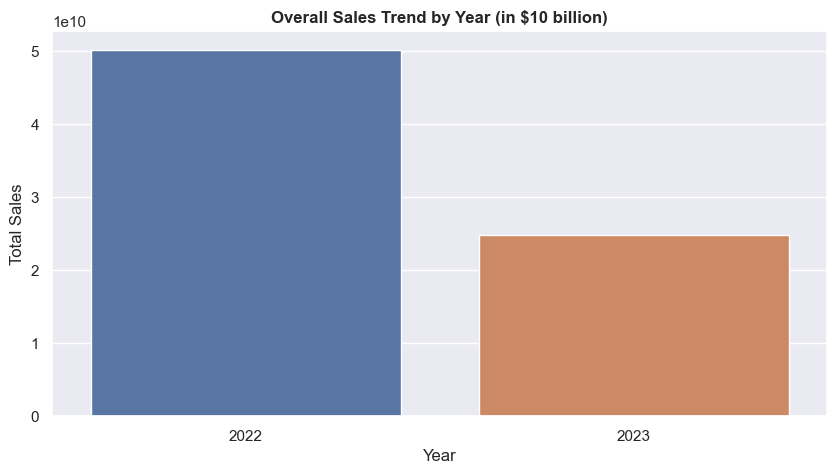

In [16]:
# Convert 'Year' column to datetime
car_sales_df['Year'] = pd.to_datetime(car_sales_df['Year'], format='%Y')

# Group the sales by year and calculate the total sales
yearly_sales = car_sales_df.groupby(car_sales_df['Year'].dt.year)['Sale Price'].sum()

# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x=yearly_sales.index, y=yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Overall Sales Trend by Year (in $10 billion)', weight = 'bold')
plt.show()

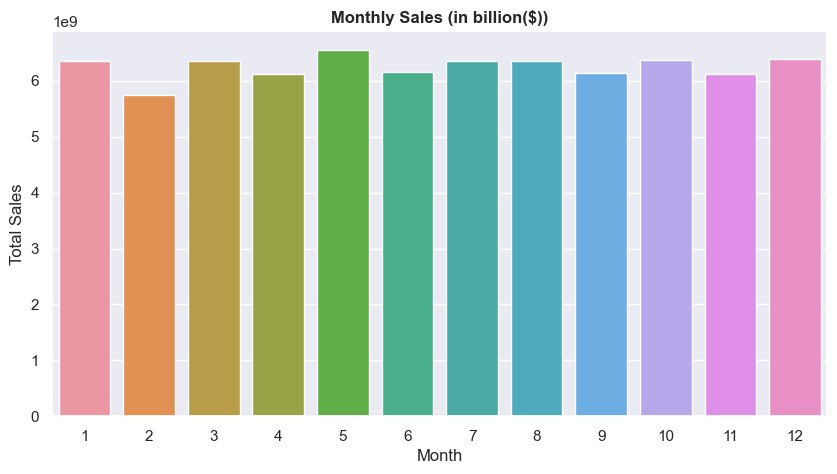

In [17]:
# Monthly sales analysis
monthly_sales = car_sales_df.groupby('Month')['Sale Price'].sum()

plt.figure(figsize=(10, 5))
sns.barplot( x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales (in billion($))', weight = 'bold')
plt.show()

In [18]:
# Group the sales by car make and calculate the total sales
sales_by_car_make = car_sales_df.groupby('Car Make')['Sale Price'].sum()

# Sort the car makes by total sales in descending order
sales_by_car_make = sales_by_car_make.sort_values(ascending=False)
sales_by_car_make

Car Make
Honda        15036898624
Chevrolet    15021372800
Toyota       15005405240
Ford         14990661833
Nissan       14976108358
Name: Sale Price, dtype: int64

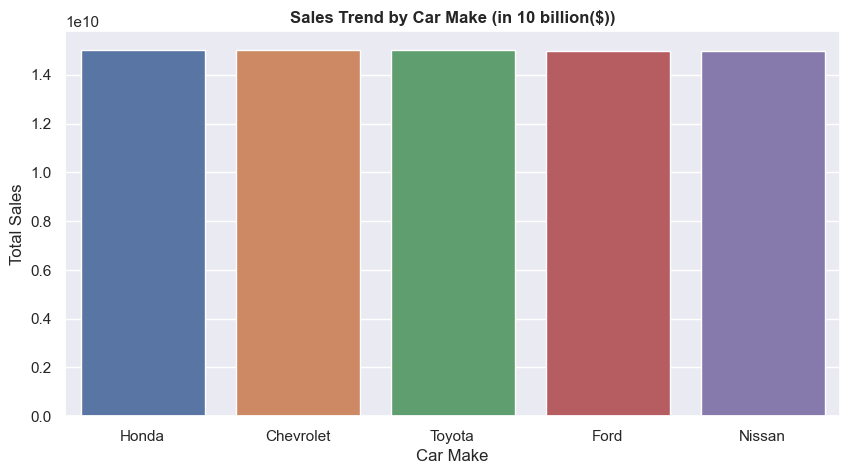

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_car_make.index, y=sales_by_car_make.values)
plt.xlabel('Car Make')
plt.ylabel('Total Sales')
plt.title('Sales Trend by Car Make (in 10 billion($))', weight='bold')
plt.show()

In [20]:
# Commission Analysis
commission_by_salesperson = car_sales_df.groupby('Salesperson')['Commission Earned'].sum()
commission_by_salesperson = commission_by_salesperson.sort_values(ascending=False)

# print first few rows to see the top 5 Salespersons with highest commission earned
commission_by_salesperson.head()

Salesperson
Michael Smith      3658467.56
Michael Johnson    2883629.29
David Smith        2456566.33
James Smith        2448405.59
Robert Smith       2275950.52
Name: Commission Earned, dtype: float64

### Correlation Analysis

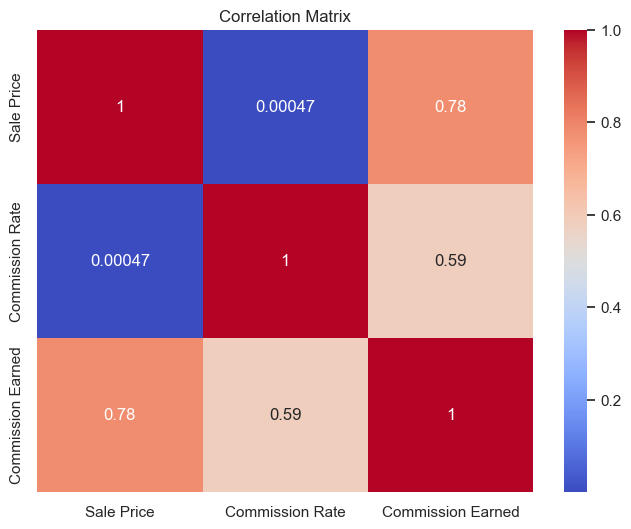

In [21]:
correlation_matrix = car_sales_df[['Sale Price', 'Commission Rate', 'Commission Earned']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

-
-
-
-
-
-
-
-
-
-
-
-
-


### Key Insights from the data
1. **The year 2022 had the highest sales, indicating a successful year for the business.**
2. **May was the month with the highest sales, suggesting a potential seasonal trend or increased demand during that period.**
3. **Honda emerged as the top-selling car make, indicating its popularity among customers.**
4. **The Silverado car model had the highest sales, implying that it is a preferred choice among buyers.**
5. **Michael Smith was the top-performing salesperson, earning the highest commission among all salespeople.**
6. **There is a strong positive correlation between the sale price and commission earned, suggesting that higher-priced sales contribute to higher commissions for the sales team.**

## THANK YOU....